In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors
import logging

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator",
                              values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita",
                               'Life satisfaction']].iloc[keep_indices]

In [3]:
# create logger with 'spam_application'
logger = logging.getLogger('Life Satisfaction')
logger.setLevel(logging.DEBUG)
# create file handler which logs even debug messages
fh = logging.FileHandler('life_satisfaction.log')
fh.setLevel(logging.DEBUG)
# create console handler with a higher log level
ch = logging.StreamHandler()
ch.setLevel(logging.ERROR)
# create formatter and add it to the handlers
formatter = logging.Formatter(
    '%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fh.setFormatter(formatter)
ch.setFormatter(formatter)
# add the handlers to the logger
logger.addHandler(fh)
logger.addHandler(ch)

In [4]:
logger.info('Loading the data.')
oecd_bli = pd.read_csv('oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('gdp_per_capita.csv', thousands=',',
                             sep='\t', encoding='latin1',
                             na_values='n/a')

In [5]:
logger.info('Preparing the data.')
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

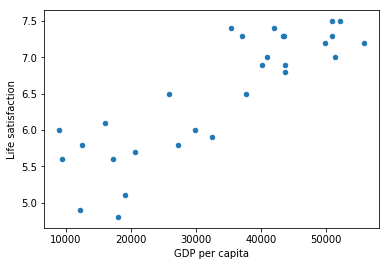

In [6]:
logger.info('Visualize the data.')
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [9]:
logger.info('Fit the linear model.')
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
logger.info('Make prediction for Cyprus.')
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new))  # outputs [[ 5.96242338]]

[[5.96242338]]


In [11]:
logger.info('Fit K-nearest Neioghbors regression.')
model = sklearn.neighbors.KNeighborsRegressor()
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [12]:
logger.info('Make prediction for Cyprus.')
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new))  # outputs [[ 5.58]]

[[5.58]]
